# Spam Mail Classification

The objective of this project is to classify spam and non spam emails based on certain email characteristics. We will build a variety of classification models using 'Accuracy' and 'Misclassification Cost' respectively as the evaluation metric and choose the best model for classifying spam mails.

## Importing Libraries

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve,precision_recall_curve, f1_score,fbeta_score,make_scorer, auc, accuracy_score
import warnings
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import tensorflow as tf 
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
import scikitplot as skplt
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving spambase.data to spambase (2).data


In [3]:
col_nm = ['word_freq_make',       
'word_freq_address',    
'word_freq_all',        
'word_freq_3d',         
'word_freq_our',        
'word_freq_over',       
'word_freq_remove',     
'word_freq_internet',   
'word_freq_order',      
'word_freq_mail',       
'word_freq_receive',    
'word_freq_will',       
'word_freq_people',     
'word_freq_report',     
'word_freq_addresses',  
'word_freq_free',       
'word_freq_business',   
'word_freq_email',      
'word_freq_you',        
'word_freq_credit',     
'word_freq_your',       
'word_freq_font',       
'word_freq_000',        
'word_freq_money',      
'word_freq_hp',         
'word_freq_hpl',        
'word_freq_george',     
'word_freq_650',        
'word_freq_lab',        
'word_freq_labs',       
'word_freq_telnet',     
'word_freq_857',        
'word_freq_data',       
'word_freq_415',        
'word_freq_85',         
'word_freq_technology', 
'word_freq_1999',       
'word_freq_parts',      
'word_freq_pm',         
'word_freq_direct',     
'word_freq_cs',         
'word_freq_meeting',    
'word_freq_original',   
'word_freq_project',    
'word_freq_re',         
'word_freq_edu',        
'word_freq_table',      
'word_freq_conference', 
'char_freq_;',         
'char_freq_(',         
'char_freq_[',         
'char_freq_!',         
'char_freq_$',         
'char_freq_#',         
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total',
'spam_or_not']
import io
df = pd.read_csv(io.BytesIO(uploaded['spambase.data']), names = col_nm)

In [4]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Data Understanding



In [5]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
df['spam_or_not'].value_counts()

0    2788
1    1813
Name: spam_or_not, dtype: int64

The data has approximately 40% spam messages and hence we do not need to do any sampling.

In [18]:
df.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

There are no null values in the data

## Data Preparation - Part 1a

In [7]:
# We will now split the data into X input variable without Purchase and Y output variable 
X = df.drop(['spam_or_not'], axis=1)
y = df['spam_or_not'].values

In [8]:
# Splitting to test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3680, 57) (921, 57) (3680,) (921,)


In [10]:
# Normalizing data with standard scaler, this step is done so that the ranges of all the predictor 
# variables stay within a normal distribution scale with mean 0, sd 1 and there is no biased weight 
# given to certain predictors due to higher range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

(3680, 57) (921, 57) (3680,) (921,)


## Evaluation Metric - Accuracy (Q2a)

For the evaluation metric for part 2a, we will use the overall accuracy of our model as indicated in the question



## Model Building



For the purpose of this homework, we will build the following models - Logistic Regression, KNN, Decision Tree and SVM Classifier, RandomForest Classifier, XGBClassifier and Simple Neural Network.


We will first perform a NestedCV approach with these models to identify the model which can generalize well for this data and then perform hyperparameter tuning for the best model and predict using that particular model.

In [112]:
models = pd.DataFrame(columns = ['Model'])
models['Model'] = ['Decision Tree','Logistic Regression', 'KNN', 'SVM Classifier', 'Random Forest Classifier', 
                   'Light GBM Classifier', 'NN']
Accuracy = []

### Logistic Regression, KNN, SVM and Decision Tree

In [113]:
# Parameters for Support Vector Machines
svm_grid = [{'kernel': ['rbf'], 
               'gamma': 10. ** np.arange(-2, 3),
               'C': [0.1, 1, 10, 100, 1000]}]

# Parameters for KNN
knn_grid = {'n_neighbors': list(range(1, 15)), 'weights': ['uniform', 'distance']}

# Parameters for Decision Tree
dt_grid = {'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}

# Parameters for Logistic Regression
lr_grid = {'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100]}

In [114]:
# Using a nested CV approach to identify the best model for this problem
inner_cv = KFold(n_splits = 4, shuffle = True, random_state = 1)
outer_cv = KFold(n_splits = 4, shuffle = True, random_state = 1)

dt = tree.DecisionTreeClassifier()
lr = linear_model.LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier()
svm = SVC()

# Inner loop for finding the right hyperparameter 
dt_clf = GridSearchCV(estimator = dt, param_grid = dt_grid, scoring = 'accuracy', cv = inner_cv)
lr_clf = GridSearchCV(estimator = lr, param_grid = lr_grid, scoring = 'accuracy', cv = inner_cv)
knn_clf = GridSearchCV(estimator = knn, param_grid = knn_grid, scoring = 'accuracy', cv = inner_cv)
svm_clf = GridSearchCV(estimator = svm, param_grid = svm_grid, scoring = 'accuracy', cv = inner_cv)

# Outer CV for finding the best model amongst the four
dt_score = cross_val_score(dt_clf, X=X, y=y, cv = outer_cv, scoring = 'accuracy')
Accuracy.append(dt_score.mean())
lr_score = cross_val_score(lr_clf, X=X_scaled, y=y, cv = outer_cv, scoring = 'accuracy')
Accuracy.append(lr_score.mean())
knn_score = cross_val_score(knn_clf, X=X_scaled, y=y, cv = outer_cv, scoring = 'accuracy')
Accuracy.append(knn_score.mean())
svm_score = cross_val_score(svm_clf, X=X_scaled, y=y, cv = outer_cv, scoring = 'accuracy')
Accuracy.append(svm_score.mean())

### Ensemble Methods

In [115]:
# Parameters for Random Forest
rf_grid = {'max_depth': [10, 30, 50],
           'min_samples_leaf': [1, 2, 4],
           'n_estimators': [50, 100]}

rf = RandomForestClassifier()
rf_clf = GridSearchCV(estimator = rf, param_grid = rf_grid, cv = inner_cv)
rf_score = cross_val_score(rf_clf, X=X, y=y, cv = outer_cv, scoring = 'accuracy')
Accuracy.append(rf_score.mean())

In [116]:
# Parameters for Light BGM
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb_grid = {'learning_rate': [0.001, 0.01, 0.1],
        'gamma': [0.5, 2, 5],
        'max_depth': [4, 6, 8],
        'n_estimators' : [50, 100] }

lgb_clf = GridSearchCV(estimator = lgb, param_grid = lgb_grid, cv = inner_cv)
lgb_score = cross_val_score(lgb_clf, X=X, y=y, cv = outer_cv, scoring = 'accuracy')
Accuracy.append(lgb_score.mean())

### Neural Network

In [117]:
def model_nn(activation='relu', nb_hidden = 10):
    model = Sequential()
    model.add(Dense(nb_hidden, activation=activation, input_dim=X.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(nb_hidden, activation=activation))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
activations = ['relu', 'tanh']
nb_hiddens = np.array([200, 300])
batches = np.array([20,40])
param_grid = dict(activation=activations, nb_hidden=nb_hiddens, batch_size=batches)
model_it = KerasClassifier(build_fn=model_nn, epochs=10, batch_size=40, verbose=1)
nn_clf = GridSearchCV(estimator=model_it, param_grid=param_grid, cv=inner_cv)
nn_nested_score = cross_val_score(nn_clf, X=X_scaled, y=y, cv=outer_cv, scoring='accuracy')
Accuracy.append(nn_nested_score.mean())

In [124]:
models['Accuracy'] = Accuracy
models[['Model','Accuracy']]

,Model,Accuracy
0,Decision Tree,0.922408
1,Logistic Regression,0.926537
2,KNN,0.920016
3,SVM Classifier,0.938056
4,Random Forest Classifier,0.955226
5,Light GBM Classifier,0.957182
6,NN,0.943707


In [123]:
models2 = models.copy()

From the above table, we can see that Ensemble models performs the best with respect to the other models in terms of Accuracy. We will now perform hyperparameter tuning to find the best parameters for the LGB Classifier model.

In [64]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [50,100],
    'max_depth': [4, 6, 8],
    'num_leaves': [6,8,12], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy
    'objective' : ['binary'],
    'random_state' : [1],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    'gamma': [0.5, 2, 5]
    }

grid = GridSearchCV(lgb, gridParams, verbose=1, cv=4, n_jobs=-1, scoring = 'accuracy')

# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print("The best parameters are :", grid.best_params_)

Fitting 4 folds for each of 1296 candidates, totalling 5184 fits
The best parameters are : {'boosting_type': 'gbdt', 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100, 'num_leaves': 12, 'objective': 'binary', 'random_state': 1, 'reg_alpha': 1.2, 'reg_lambda': 1}


The best parameters for the Light GBM model are

'boosting_type': 'gbdt', 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100, 'num_leaves': 12, 'objective': 'binary', 'random_state': 1, 'reg_alpha': 1.2, 'reg_lambda': 1

In [70]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          learning_rate = grid.best_params_['learning_rate'],
          n_estimators = grid.best_params_['n_estimators'],
          max_depth = grid.best_params_['max_depth'],
          num_leaves =grid.best_params_['num_leaves'], 
          reg_alpha = grid.best_params_['reg_alpha'], 
          reg_lambda = grid.best_params_['reg_lambda'], 
          gamma = grid.best_params_['gamma'],
          num_boost_round = 500)


model = lgb.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [84]:
# Visualizing the confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Spam', 'Predicted Spam'],
    index=['Actual Non Spam', 'Actual Spam'])

,Predicted Not Spam,Predicted Spam
Actual Non Spam,549,15
Actual Spam,27,330


In [72]:
# Evaluation Metrics
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test,y_pred))
print("f-score:", f1_score(y_test, y_pred))

Recall: 0.9243697478991597
Precision: 0.9565217391304348
Accuracy: 0.9543973941368078
f-score: 0.9401709401709402


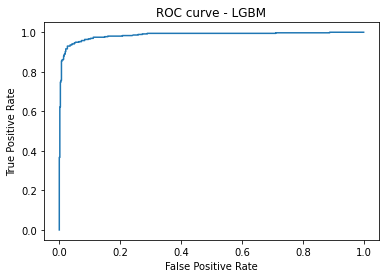

Area Under Curve:  0.9849712934819317


In [73]:
# Plotting ROC curve and AUC
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve - LGBM')
plt.show()

roc_auc = auc(fpr, tpr)
print("Area Under Curve: ", roc_auc)

Text(0.5, 1.0, 'Precision - Recall Curve')

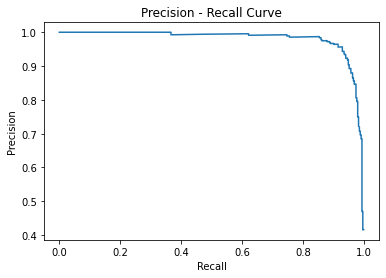

In [74]:
# Plotting the Precision Recall Curve
precision_score, recall_score, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall_score, precision_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision - Recall Curve')

Text(0.5, 1.0, 'Cumulative Gain Curve')

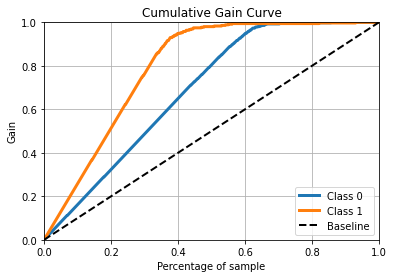

In [78]:
# Plotting the cumulative gain curve
skplt.metrics.plot_cumulative_gain(y_test, model.predict_proba(X_test))
plt.title('Cumulative Gain Curve')

We can see that 40% of the sample is able to capture around 90% of the spam emails and performs much better than a Random Classifier. 

## Evaluation Metric - Misclassification Cost (Q2b)

For the evaluation metric for part 2b, we will use the overall misclassification cost. For this purpose we will create a custom function for calculating misclassification cost.

In [98]:
def misclassification_cost(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = -1 * ((10*fp + fn)/(tn+fp+fn+tp))
    return cost

Spam email is considered a positive data (1) here. The cost of classifying a non spam as a spam (False Positive) is higher than the cost of classifying a spam as a non spam since relevant important messages may get lost if we classify a non spam as a spam. Thus we must minimize the False Positive.

In [99]:
misclass_score = make_scorer(misclassification_cost, greater_is_better=True)
misclass = []

### Logistic Regression, KNN, SVM and Decision Tree

In [100]:
# Using a nested CV approach to identify the best model for this problem
inner_cv = KFold(n_splits = 4, shuffle = True, random_state = 1)
outer_cv = KFold(n_splits = 4, shuffle = True, random_state = 1)

dt = tree.DecisionTreeClassifier()
lr = linear_model.LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier()
svm = SVC()

# Inner loop for finding the right hyperparameter 
dt_clf = GridSearchCV(estimator = dt, param_grid = dt_grid, cv = inner_cv)
lr_clf = GridSearchCV(estimator = lr, param_grid = lr_grid, cv = inner_cv)
knn_clf = GridSearchCV(estimator = knn, param_grid = knn_grid,  cv = inner_cv)
svm_clf = GridSearchCV(estimator = svm, param_grid = svm_grid,  cv = inner_cv)

# Outer CV for finding the best model amongst the four
dt_score = cross_val_score(dt_clf, X=X, y=y, cv = outer_cv, scoring = misclass_score)
misclass.append(dt_score.mean())
lr_score = cross_val_score(lr_clf, X=X_scaled, y=y, cv = outer_cv, scoring = misclass_score)
misclass.append(lr_score.mean())
knn_score = cross_val_score(knn_clf, X=X_scaled, y=y, cv = outer_cv, scoring = misclass_score)
misclass.append(knn_score.mean())
svm_score = cross_val_score(svm_clf, X=X_scaled, y=y, cv = outer_cv, scoring = misclass_score)
misclass.append(svm_score.mean())

### Ensemble Methods

In [102]:
# Parameters for Random Forest
rf_grid = {'max_depth': [10, 30, 50],
           'min_samples_leaf': [1, 2, 4],
           'n_estimators': [50, 100]}

rf = RandomForestClassifier()
rf_clf = GridSearchCV(estimator = rf, param_grid = rf_grid, cv = inner_cv)
rf_score = cross_val_score(rf_clf, X=X, y=y, cv = outer_cv, scoring = misclass_score)
misclass.append(rf_score.mean())

In [103]:
# Parameters for Light BGM
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb_grid = {'learning_rate': [0.001, 0.01, 0.1],
        'a': [0.5, 2, 5],
        'max_depth': [4, 6, 8],
        'n_estimators' : [50, 100] }

lgb_clf = GridSearchCV(estimator = lgb, param_grid = lgb_grid, cv = inner_cv)
lgb_score = cross_val_score(lgb_clf, X=X, y=y, cv = outer_cv, scoring = misclass_score)
misclass.append(lgb_score.mean())

### Neural Network

In [104]:
# Defining a Sequential Neural Network
def model_nn(activation='relu', nb_hidden = 10):
    model = Sequential()
    model.add(Dense(nb_hidden, activation=activation, input_dim=X.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(nb_hidden, activation=activation))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid')) 
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

We will use a sigmoid activation function for the output layer as this is a binary prediction task and hence the loss function is considered to be a binary_cross entropy function. We are also applying dropout of 0.2 to perform regularization

In [ ]:
# Defining parameters for Simple NN
activations = ['relu', 'tanh']
nb_hiddens = np.array([200, 300])
batches = np.array([20,40])

param_grid = dict(activation=activations, nb_hidden=nb_hiddens, batch_size=batches)
model_it = KerasClassifier(build_fn=model_nn, epochs=10, batch_size=40, verbose=1)
nn_clf = GridSearchCV(estimator=model_it, param_grid=param_grid, cv=inner_cv)
nn_nested_score = cross_val_score(nn_clf, X=X_scaled, y=y, cv=outer_cv, scoring = misclass_score)
misclass.append(nn_nested_score.mean())

In [173]:
models['MisclassificationCost'] = misclass
models[['Model','MisclassificationCost']].sort_values('MisclassificationCost')

,Model,MisclassificationCost
4,Random Forest Classifier,0.210834
5,Light GBM Classifier,0.214960
3,SVM Classifier,0.273214
6,NN,0.277344
1,Logistic Regression,0.337337
2,KNN,0.385148
0,Decision Tree,0.442510


From the above table, we can see that Ensemble models performs the best with respect to the other models in terms of misclassification cost. We will now perform hyperparameter tuning to find the best parameters for the Random Forest Classifier model. 

Neural networks does not have enough data to train to its full potential and hence has a higher misclassification cost. Ensemble models outperform the other statistical models such as SVM, Logistic Regression and Simple Decision Tree as ensemble models can learn from errors and use a combination of multiple ML models to fit the data better. 

KNN and Decision Tree are very simple models and are not able to generalize well and hence has high misclassification cost.

## Building the Best Model for misclassification cost

In [125]:
rf = RandomForestClassifier()

# Create the param grid
param_grid = {'n_estimators': [100,200,500],
               'max_features': ['auto','sqrt'],
               'max_depth': [5,10,15],
               'min_samples_split': [2,5,10],
               'min_samples_leaf': [1,2,4],
               'bootstrap': [True,False]}

# The scoring parameter for this model will be misclassification cost
grid = GridSearchCV(rf, param_grid, verbose=1, cv=4, n_jobs=-1, scoring = misclass_score)

# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print("The best parameters are :", grid.best_params_)

Fitting 4 folds for each of 324 candidates, totalling 1296 fits
The best parameters are : {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


The best parameters for the Random Forest model are


'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200



In [128]:
# Fitting the train data and predicting on test data
rf = RandomForestClassifier(max_features = grid.best_params_['max_features'],
          n_estimators = grid.best_params_['n_estimators'],
          max_depth = grid.best_params_['max_depth'],
          min_samples_split =grid.best_params_['min_samples_split'], 
          min_samples_leaf = grid.best_params_['min_samples_leaf'], 
          bootstrap = grid.best_params_['bootstrap'])


model = rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [177]:
# Visualizing the confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Spam', 'Predicted Spam'],
    index=['Actual Non Spam', 'Actual Spam'])

,Predicted Not Spam,Predicted Spam
Actual Non Spam,551,13
Actual Spam,24,333


In [181]:
# Evaluation Metrics
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test,y_pred))
print("f-score:", f1_score(y_test, y_pred))
print("Average Misclassification Cost: ", misclassification_cost(y_test, y_pred) * -1)

Recall: 0.9327731092436975
Precision: 0.9624277456647399
Accuracy: 0.9598262757871878
f-score: 0.9473684210526316
Average Misclassification Cost:  0.16720955483170466


The best model using Random Forest Classifier gave a misclassification cost of 0.167.

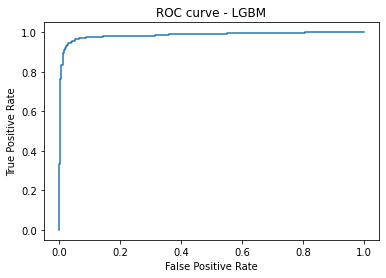

Area Under Curve:  0.9849812265331664


In [131]:
# Plotting ROC curve and AUC
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve - LGBM')
plt.show()

roc_auc = auc(fpr, tpr)
print("Area Under Curve: ", roc_auc)

Text(0.5, 1.0, 'Precision - Recall Curve')

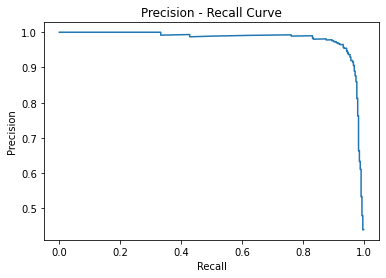

In [132]:
# Plotting the Precision Recall Curve
precision_score, recall_score, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall_score, precision_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision - Recall Curve')

Text(0.5, 1.0, 'Cumulative Gain Curve')

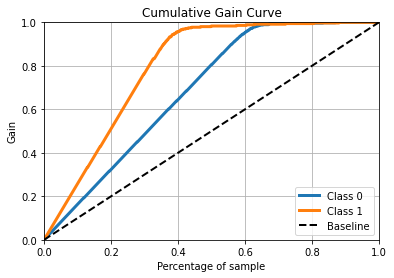

In [133]:
# Plotting the cumulative gain curve
skplt.metrics.plot_cumulative_gain(y_test, model.predict_proba(X_test))
plt.title('Cumulative Gain Curve')

40% of the data is able to predict over 90% of the spam emails which indicate that our model performs much better than a random classifier

# Comparing the Best Models using both metrics

In [152]:
compare_dict = {'Eval Metric':['Accuracy','Avg Misclassification Cost'],
        'Accuracy' : [0.9543973941368078, 0.9598262757871878],
        'Recall' : [0.9243697478991597, 0.9327731092436975 ],
        'Precision': [0.9565217391304348, 0.9624277456647399],
        'F-Score':[0.9401709401709402,  0.9473684210526316],
        'AUC': [0.9849712934819317,0.9849812265331664]}

compare_df = pd.DataFrame.from_dict(compare_dict)
compare_df['Model'] = ['Light GBM Classifier','Random Forest Classifer']
compare_df.set_index('Model', inplace=True)
compare_df

,Eval Metric,Accuracy,Recall,Precision,F-Score,AUC
Model,,,,,,
Light GBM Classifier,Accuracy,0.954397,0.924370,0.956522,0.940171,0.984971
Random Forest Classifer,Avg Misclassification Cost,0.959826,0.932773,0.962428,0.947368,0.984981


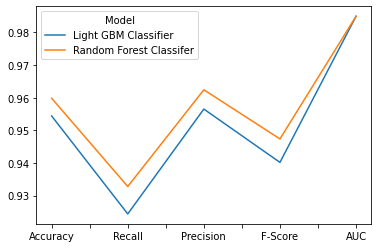

In [162]:
compare_df.transpose().iloc[1:].plot.line()

Clearly from the above chart we can see that the Random Forest Classifier which was trained using the misclassification cost, also has higher values for Accuracy, Recall, Precision and F-Score. Advanced tuning of Light GBM may lead to better performance. But with the current input hyperparameter options, Random Forest Classifer performs better overall.

Also, from a business standpoint, building a model using average misclassification cost is more robust as classifying a Non Spam as a Spam can prove to be costly. Thus we can choose Random Forest as the final model with the above performance metrics and an average misclassification cost of 0.16.